In [311]:
import pandas as pd
from string import punctuation
import re
from unidecode import unidecode
import nltk
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [312]:
sentencas =  ['King is a strong man!', 
          'Queen is a wise woman!', 
          'Is this man strong?', 
          'Is this Woman pretty?',
          'Prince is a boy that will be King.',
          'Princess is a girl that will be Queen.']

In [313]:
df = pd.DataFrame(sentencas)

df.columns = ['frase']

In [314]:
df.head()

,frase
0,King is a strong man!
1,Queen is a wise woman!
2,Is this man strong?
3,Is this Woman pretty?
4,Prince is a boy that will be King.


In [315]:
df['frase'][0] = df['frase'][0].lower()

In [316]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [317]:
pontuacao = list(punctuation)

pontuacao.append('\"')
pontuacao.append('\'')
pontuacao.append('``')
pontuacao.append('`')
pontuacao.append('\n')
pontuacao.append('\t')

pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '"',
 "'",
 '``',
 '`',
 '\n',
 '\t']

In [318]:
''.join([l for l in df['frase'][0] if l not in punctuation])

'king is a strong man'

In [319]:
n = 'Maria'

print(re.match('^M', n))

<re.Match object; span=(0, 1), match='M'>


In [320]:
t = "A volta dos que não foram 2"

In [321]:
l = t.split()

In [322]:
l

['A', 'volta', 'dos', 'que', 'não', 'foram', '2']

In [323]:
' '.join(l)

'A volta dos que não foram 2'

In [324]:
exemplo = "A volta dos que não foram 2 - O Retorno"


exemplo = ' '.join([l for l in exemplo.split() if not re.search('^\d', l)])

In [325]:
unidecode(exemplo)

'A volta dos que nao foram - O Retorno'

In [326]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [327]:
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para']

In [328]:
stopwordsE = nltk.corpus.stopwords.words('english')
stopwordsE[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [329]:
" ".join(SnowballStemmer.languages)

'arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish'

In [330]:
# Exemplo de Stemming aplicado ao inglês
stemmer = SnowballStemmer("english")
print(stemmer.stem("consign"), stemmer.stem("consigned"), stemmer.stem("consigning"), stemmer.stem("consignment"))

consign consign consign consign


In [331]:
# Exemplo de Stemming aplicado ao português
stemmer = SnowballStemmer("portuguese")
print(stemmer.stem("programa"), stemmer.stem("programar"), stemmer.stem("programando"), stemmer.stem("programava"))

program program program program


In [332]:
exemplo += ' Melhor filme de todos os tempos'

In [333]:

# Função que recebe uma string e retorna a mesma processada
def processa(txt):
    # Substitui a pontuação e os caracteres especiais por um espaço em branco.
    for p in pontuacao:
        txt = txt.replace(p, ' ')import warnings
warnings.filterwarnings('ignore')
    return ' '.join([t for t in txt.lower().split() if (len(t)>2) if not re.search('^\d', t) and (t not in stopwordsE)])

In [334]:
processa(exemplo)

'volta dos que não foram retorno melhor filme todos tempos'

In [335]:
df.iterrows()

<generator object DataFrame.iterrows at 0x7f1df7c477c8>

In [336]:
corpus = []
for i in df.iterrows():
    corpus.append(processa(i[1]['frase']).split())

In [337]:
corpus

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

# Word2Vec

Word2vec é um par de modelos de aprendizado não supervisionado para criação de uma representação vetorial de palavras presentes em textos que usam linguagem natural.

Vale ressaltar que existem outros modelos de word embedding a ser estudados, entre os mais conhecidos estão o GloVe e o fasttext do facebook.

### Parâmetros
size: A dimensionalidade dos vetores densos utilizados para representar cada token ou palavra.

window: A distância maxima entre uma determinada palavra ( target) e palavras vizinhas que serão consideradas para contruir o contexto da palavra target. Quando essa distancia é menor o conceito ligado a uma pelavra é mais específico e quando é maior, o conceito tende a ser mais genérico.

min_count: Ignora palavras com a frequencia total inferior ao valor estipulado por esse parâmetro. O valor padrão desse parâmetro é 5, ou seja, palavras que se repetem menos de 5 vezes não serão adicionados ao vocabulário do modelo.

sg: Define o algoritmo que será utilizado para treinamento ( 0 para CBOW e 1 para Skip-Gram).

workers: Numero de threads que serça usadas pra treinar, diretamente ligado ao desempenho.

iter: Numero de iterações sobre o corpus.

Link explicando cada parâmetro: https://radimrehurek.com/gensim/models/word2vec.html

In [338]:
modelo = Word2Vec(corpus, size=50, window=2, min_count=0, workers=10, sg=0, iter=100)

In [339]:
modelo

In [340]:
# Nessa etapa o vocabulário do modelo ja foi criado e um vetor ja foi definido para cada palavra.
modelo.wv.vocab

{'king': <gensim.models.keyedvectors.Vocab at 0x7f1df7c6e630>,
 'strong': <gensim.models.keyedvectors.Vocab at 0x7f1df7c6e748>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7f1df7c48080>,
 'queen': <gensim.models.keyedvectors.Vocab at 0x7f1df7c480f0>,
 'wise': <gensim.models.keyedvectors.Vocab at 0x7f1df7c48198>,
 'woman': <gensim.models.keyedvectors.Vocab at 0x7f1df7c482b0>,
 'pretty': <gensim.models.keyedvectors.Vocab at 0x7f1df7c48400>,
 'prince': <gensim.models.keyedvectors.Vocab at 0x7f1df7c482e8>,
 'boy': <gensim.models.keyedvectors.Vocab at 0x7f1df7c48320>,
 'princess': <gensim.models.keyedvectors.Vocab at 0x7f1df7c481d0>,
 'girl': <gensim.models.keyedvectors.Vocab at 0x7f1df7c48390>}

In [341]:
# Exemplo de vetor que representa uma palavra
modelo.wv['king']

array([ 9.8555405e-03,  7.6100109e-03,  7.9833521e-03, -2.5528853e-03,
       -3.6101195e-03,  7.9092337e-03, -6.8773901e-05,  7.8733731e-03,
       -1.1946395e-03,  3.3189610e-03,  6.5840501e-03,  6.2762666e-03,
        9.4411504e-03, -8.0360714e-03, -7.6834518e-03,  3.6328246e-03,
        7.5576133e-03, -8.8922959e-03,  8.2573947e-03,  8.0404133e-03,
       -9.0982197e-03, -8.3251344e-03, -5.1904800e-03,  1.5516119e-04,
       -8.2977135e-03,  9.2361616e-03, -3.7498600e-03, -8.7472694e-03,
        7.3742042e-03,  7.0987307e-03, -3.3919618e-03,  9.7834440e-03,
       -7.3152264e-03, -8.1535159e-03, -6.7571267e-03, -6.2369881e-03,
        4.0060014e-04, -4.8359521e-03,  5.9044464e-03, -2.6484265e-03,
        8.6564047e-04, -1.8625874e-03,  3.4120795e-03,  6.2673232e-03,
       -8.3111757e-03, -6.0885469e-03, -5.0809016e-03, -9.5562758e-03,
       -4.6093944e-03, -4.1567357e-03], dtype=float32)

In [342]:
len(modelo.wv['king'])

50

In [343]:
modelo.train(corpus, total_examples=len(corpus), epochs=100)

(191, 1600)

In [344]:
#funçao pra plotar um grafico de dispersão das palavras
def plota_grafico(modelo):
    # fit a 2d PCA model to the vectors
    X = modelo[modelo.wv.vocab]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    # create a scatter plot of the projection
    pyplot.scatter(result[:, 0], result[:, 1])
    words = list(modelo.wv.vocab)
    for i, word in enumerate(words):
        pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    pyplot.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

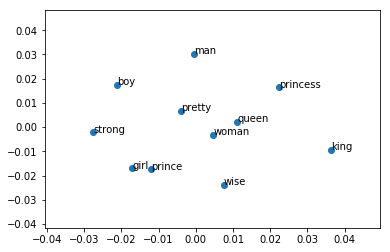

In [345]:
plota_grafico(modelo)

In [346]:
modelo.save('models/modelo_teste')

In [348]:
word_vectors = KeyedVectors.load('models/modelo_teste', mmap='r')

In [349]:
word_vectors.similarity(w1='man', w2='man')

1.0

In [350]:
word_vectors.most_similar(positive=['prince'], topn=1)

[('strong', 0.11386103183031082)]

In [351]:
word_vectors.most_similar(positive=['woman'], topn=1,)

[('wise', 0.19763833284378052)]

In [352]:
word_vectors.most_similar(positive=['boy', 'girl'], negative=['strong'], topn=1)

[('queen', 0.31087204813957214)]

In [353]:
word_vectors.most_similar(positive=['prince', 'queen'], negative=['boy'], topn=1)

[('king', 0.4017934203147888)]

# Odd-One-Out
Exclui a palavra que está fora do contexto, ou a palavra mais distante do contexto geral.

In [354]:
word_vectors.doesnt_match(['king', 'queen', 'strong'])

'strong'

In [355]:
word_vectors.doesnt_match(['prince', 'princess', 'king'])

'prince'

In [356]:
word_vectors.doesnt_match(['king', 'queen', 'woman'])

'woman'

In [357]:
word_vectors.doesnt_match(['king', 'queen', 'boy'])

'boy'

In [ ]:
word_vectors.doesnt_match(['strong', 'queen', 'boy'])